In [272]:
# import all packages
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import MultiPoint, Point
import requests
import folium
import geopandas as gpd
import fiona

#turn off all deprecation warnings bc annoying
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [273]:
#pull the APIs from OSM of green space locations within Johnson County

place = 'Johnson County Iowa, USA'
tags= {'leisure':'park', 'boundary':'forest', 'boundary':'national_park', 'landuse':'forest', 'landuse':'recreation_ground',
      'leisure':'garden', 'leisure':'nature_reserve', 'natural':'wood'}

df = ox.geometries_from_place(place,tags=tags)

df.head(5)

C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


landuse         leisure  \
element_type osmid                                           
node         7775769597  recreation_ground            park   
way          29273967                  NaN  nature_reserve   
             29782643                  NaN  nature_reserve   
             60614862                  NaN             NaN   
             107262574                 NaN             NaN   

                                                                   name  \
element_type osmid                                                        
node         7775769597  Nancy Seiberlin Heritage Grove Recreation Area   
way          29273967                    Ryerson's Woods State Preserve   
             29782643                         Frytown Conservation Area   
             60614862                                               NaN   
             107262574                                              NaN   

                                                                  geometry  \
element_type osmid                                                           
node         7775769597                         POINT (-91.51469 41.67200)   
way          29273967    POLYGON ((-91.54586 41.61725, -91.54637 41.616...   
             29782643    POLYGON ((-91.71244 41.58375, -91.72691 41.584...   
             60614862    POLYGON ((-91.38058 41.81796, -91.37967 41.818...   
             107262574   POLYGON ((-91.60493 41.66620, -91.60558 41.666...   

                                                                     nodes  \
element_type osmid                                                           
node         7775769597                                                NaN   
way          29273967    [321905272, 321905273, 321905274, 321905275, 3...   
             29782643    [328087427, 328087430, 328087432, 5506648967, ...   
             60614862    [757794680, 757794743, 757794741, 757794739, 7...   
             107262574   [1233180198, 1233180272, 1233180321, 123318025...   

                               boundary  ele gnis:county_id gnis:created  \
element_type osmid                                                         
node         7775769597             NaN  NaN            NaN          NaN   
way          29273967    protected_area  218            103   10/04/2004   
             29782643    protected_area  NaN            NaN          NaN   
             60614862               NaN  NaN            NaN          NaN   
             107262574              NaN  NaN            NaN          NaN   

                        gnis:feature_id  ... addr:street abandoned:landuse  \
element_type osmid                       ...                                 
node         7775769597             NaN  ...         NaN               NaN   
way          29273967           2047467  ...         NaN               NaN   
             29782643               NaN  ...         NaN               NaN   
             60614862               NaN  ...         NaN               NaN   
             107262574              NaN  ...         NaN               NaN   

                        access elevation leaf_cycle area owner leaf_type ways  \
element_type osmid                                                              
node         7775769597    NaN       NaN        NaN  NaN   NaN       NaN  NaN   
way          29273967      NaN       NaN        NaN  NaN   NaN       NaN  NaN   
             29782643      NaN       NaN        NaN  NaN   NaN       NaN  NaN   
             60614862      NaN       NaN        NaN  NaN   NaN       NaN  NaN   
             107262574     NaN       NaN        NaN  NaN   NaN       NaN  NaN   

                        type  
element_type osmid            
node         7775769597  NaN  
way          29273967    NaN  
             29782643    NaN  
             60614862    NaN  
             107262574   NaN  

[5 rows x 31 columns]

C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

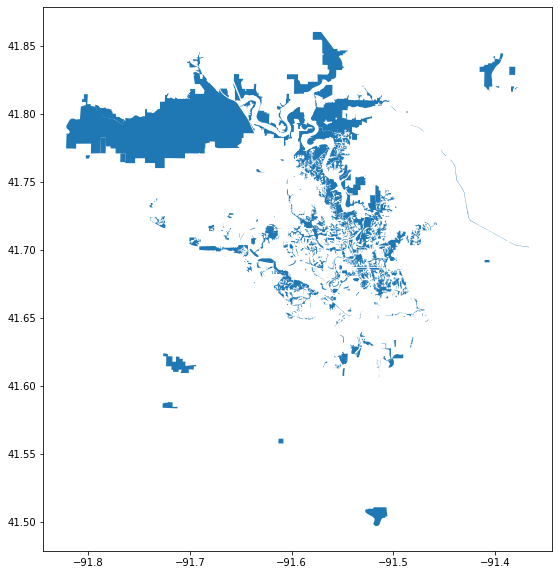

In [274]:
#made sure it's in a geodataframe
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326")

#remove all the point features, keep only the polygons & multipolygons
gdf = gdf[gdf.geom_type != 'Point']

#plot the new gdf
gdf.plot(figsize=(15,10))


In [275]:
#import a basemap of Iowa City using Open Street Maps
map_osm = folium.Map(location=[41.6611, -91.5302], zoom_start=11)

#convert to geojson just for projecting onto Folium maps
gsjon = gdf.to_crs(epsg='4326').to_json()
polygons = folium.features.GeoJson(gsjon)

map_osm.add_child(polygons)
map_osm

C:\Users\tfilip\AppData\Local\Temp\ipykernel_17140\3433978450.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf['geometry'].centroid
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" i

<AxesSubplot:>

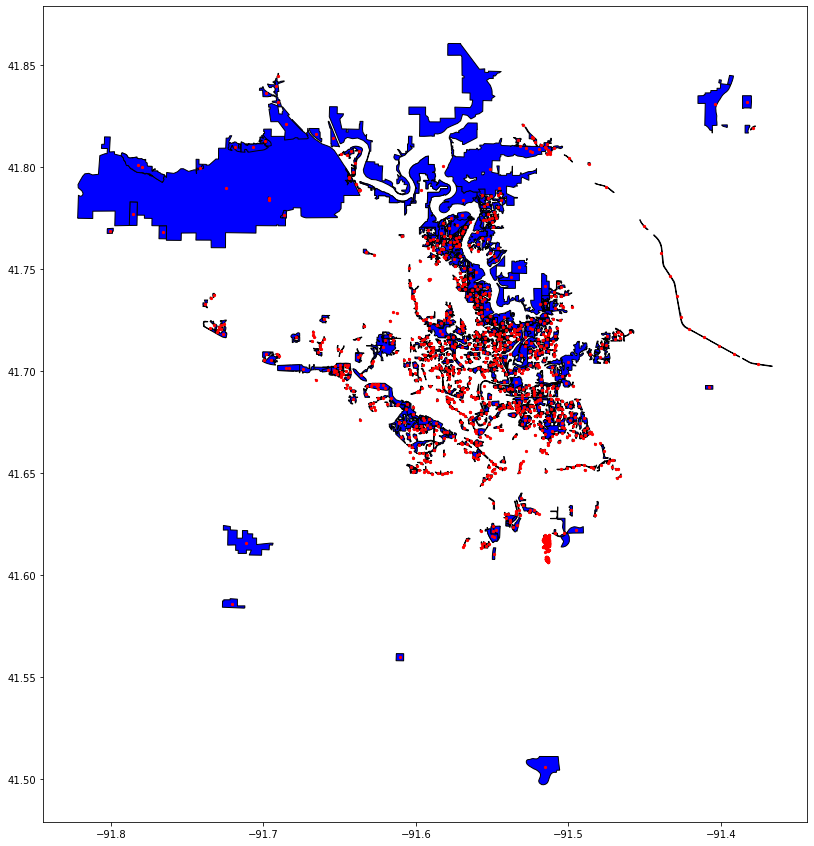

In [276]:
#get the centroids of each polygon
centroid = gdf['geometry'].centroid

#plot the basemap as the polygons in blue
base = gdf.plot(color='blue', edgecolor='black', figsize=(15,15))
#plot the centroids on top of that in red 
centroid.plot(ax=base, marker='o', color="red", markersize=5)


In [277]:
#examine the features of the centroid geodataframe = theyre all point features in the correct projection
centroid

element_type  osmid    
way           29273967     POINT (-91.54879 41.61849)
              29782643     POINT (-91.72092 41.58584)
              60614862     POINT (-91.37909 41.81908)
              107262574    POINT (-91.60477 41.66769)
              107262576    POINT (-91.61008 41.66776)
                                      ...            
relation      14103067     POINT (-91.53096 41.63752)
              14335605     POINT (-91.51291 41.61545)
              14339860     POINT (-91.51398 41.61456)
              14345819     POINT (-91.51465 41.61361)
              14359403     POINT (-91.51565 41.61429)
Length: 1331, dtype: geometry

In [278]:
#import a shapefile of johnson county by census tract as a new geodataframe called census
census = gpd.read_file('H:/Classes/Geographic Visualization/Final Project/johnsoncountyshape/johnsoncountyshp.shp')
census

STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0       19      103  001801  19103001801   18.01   Census Tract 18.01  G5020   
1       19      103  010301  19103010301  103.01  Census Tract 103.01  G5020   
2       19      103  010302  19103010302  103.02  Census Tract 103.02  G5020   
3       19      103  001802  19103001802   18.02   Census Tract 18.02  G5020   
4       19      103  000200  19103000200       2       Census Tract 2  G5020   
5       19      103  000301  19103000301    3.01    Census Tract 3.01  G5020   
6       19      103  001600  19103001600      16      Census Tract 16  G5020   
7       19      103  001300  19103001300      13      Census Tract 13  G5020   
8       19      103  001500  19103001500      15      Census Tract 15  G5020   
9       19      103  001700  19103001700      17      Census Tract 17  G5020   
10      19      103  002100  19103002100      21      Census Tract 21  G5020   
11      19      103  002300  19103002300      23      Census Tract 23  G5020   
12      19      103  000600  19103000600       6       Census Tract 6  G5020   
13      19      103  000500  19103000500       5       Census Tract 5  G5020   
14      19      103  001100  19103001100      11      Census Tract 11  G5020   
15      19      103  001200  19103001200      12      Census Tract 12  G5020   
16      19      103  000100  19103000100       1       Census Tract 1  G5020   
17      19      103  010500  19103010500     105     Census Tract 105  G5020   
18      19      103  000400  19103000400       4       Census Tract 4  G5020   
19      19      103  010400  19103010400     104     Census Tract 104  G5020   
20      19      103  000302  19103000302    3.02    Census Tract 3.02  G5020   
21      19      103  010100  19103010100     101     Census Tract 101  G5020   
22      19      103  010200  19103010200     102     Census Tract 102  G5020   
23      19      103  001400  19103001400      14      Census Tract 14  G5020   

   FUNCSTAT      ALAND    AWATER     INTPTLAT      INTPTLON  area      area1  \
0         S   13934664    593000  +41.6175794  -091.5012925     0   14527661   
1         S  197309634   1967183  +41.7380390  -091.7216768     0  199276816   
2         S   40226649   4782790  +41.7438502  -091.5807048     0   45009443   
3         S    3294885    124425  +41.6366549  -091.5242066     0    3419307   
4         S    3173368     95385  +41.6784456  -091.5705349     0    3268754   
5         S   19799792    112799  +41.7008388  -091.6009113     0   19912592   
6         S    1070193         0  +41.6566484  -091.5259596     0    1070195   
7         S    1839703         0  +41.6621556  -091.4923332     0    1839706   
8         S    1476994         0  +41.6523399  -091.5102310     0    1476995   
9         S    3944928     24865  +41.6425449  -091.5094982     0    3969792   
10        S     830974    102373  +41.6613117  -091.5361396     0     933352   
11        S    3425128    211620  +41.6658768  -091.5469903     0    3636749   
12        S    1207298     49909  +41.6513187  -091.5442580     0    1257206   
13        S    5009489         0  +41.6498904  -091.5650786     0    5009490   
14        S     942778         0  +41.6655698  -091.5284791     0     942774   
15        S    1224066         0  +41.6608064  -091.5108113     0    1224065   
16        S   19555609    473970  +41.6833985  -091.5144542     0   20029579   
17        S  314428241   1849882  +41.5436255  -091.4350440     0  316278146   
18        S   37180226         0  +41.6546880  -091.6099300     0   37180227   
19        S  444457781   1629061  +41.5936075  -091.6822704     0  446086848   
20        S    3337753         0  +41.6862146  -091.5946836     0    3337759   
21        S  310306242  10090900  +41.7766742  -091.4669488     0  320397152   
22        S  156756841   3978508  +41.8178996  -091.7075010     0  160735360   
23        S    2906778         0  +41.6488961  -091.4913927     0    2906776   

 

C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

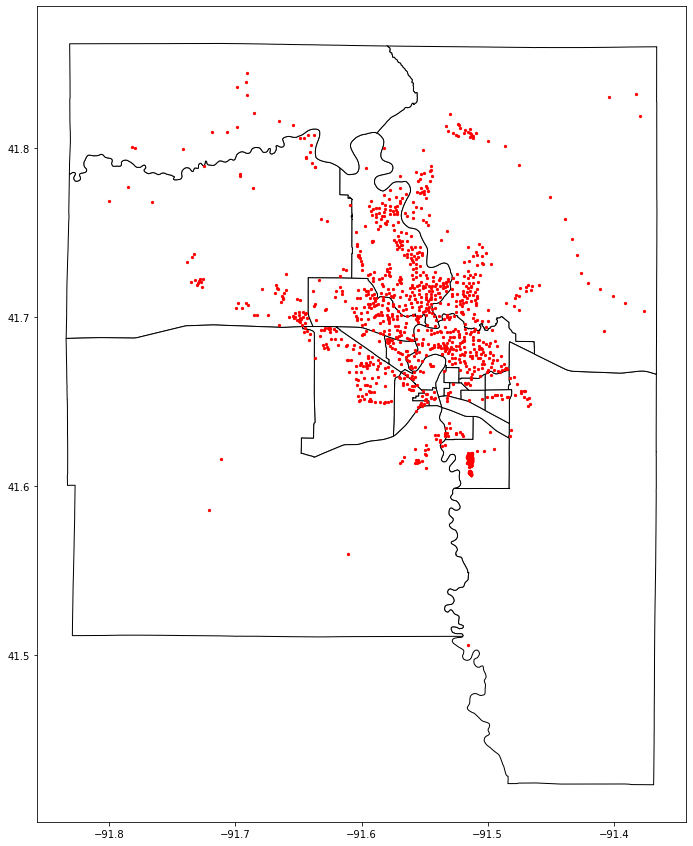

In [279]:
#plot the centroids on the map with the census tract data
#base of the plot = the census tract shapefiel
base = census.plot(color='white', edgecolor='black', figsize=(15,15))
#centroids of the greenspaces = red markers
centroid.plot(ax=base, marker='o', color="red", markersize=5)

In [280]:
#first find the number of points within each polygon (each census tract)
dfsjoin = gpd.sjoin(left_df=gdf, right_df=census, how='left') #Left or polygons with zero points are discarded
dfcount = dfsjoin.groupby('TRACTCE')['geometry'].count().rename('pointcount').reset_index() #count by number within polygon and return new df

dfcount

TRACTCE  pointcount
0   000100         169
1   000200          23
2   000301         116
3   000302           5
4   000400          89
5   000500          19
6   000600          11
7   001200           5
8   001300           1
9   001400           9
10  001500           2
11  001600           4
12  001700           2
13  001801         321
14  001802          11
15  002100           1
16  002300          16
17  010100         175
18  010200          15
19  010301          82
20  010302         239
21  010400          32
22  010500          16

In [281]:
#append dfcount (the pointcount column) to census gdf
census = pd.merge(census, dfcount, on='TRACTCE', how='outer')
census

STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0       19      103  001801  19103001801   18.01   Census Tract 18.01  G5020   
1       19      103  010301  19103010301  103.01  Census Tract 103.01  G5020   
2       19      103  010302  19103010302  103.02  Census Tract 103.02  G5020   
3       19      103  001802  19103001802   18.02   Census Tract 18.02  G5020   
4       19      103  000200  19103000200       2       Census Tract 2  G5020   
5       19      103  000301  19103000301    3.01    Census Tract 3.01  G5020   
6       19      103  001600  19103001600      16      Census Tract 16  G5020   
7       19      103  001300  19103001300      13      Census Tract 13  G5020   
8       19      103  001500  19103001500      15      Census Tract 15  G5020   
9       19      103  001700  19103001700      17      Census Tract 17  G5020   
10      19      103  002100  19103002100      21      Census Tract 21  G5020   
11      19      103  002300  19103002300      23      Census Tract 23  G5020   
12      19      103  000600  19103000600       6       Census Tract 6  G5020   
13      19      103  000500  19103000500       5       Census Tract 5  G5020   
14      19      103  001100  19103001100      11      Census Tract 11  G5020   
15      19      103  001200  19103001200      12      Census Tract 12  G5020   
16      19      103  000100  19103000100       1       Census Tract 1  G5020   
17      19      103  010500  19103010500     105     Census Tract 105  G5020   
18      19      103  000400  19103000400       4       Census Tract 4  G5020   
19      19      103  010400  19103010400     104     Census Tract 104  G5020   
20      19      103  000302  19103000302    3.02    Census Tract 3.02  G5020   
21      19      103  010100  19103010100     101     Census Tract 101  G5020   
22      19      103  010200  19103010200     102     Census Tract 102  G5020   
23      19      103  001400  19103001400      14      Census Tract 14  G5020   

   FUNCSTAT      ALAND    AWATER     INTPTLAT      INTPTLON  area      area1  \
0         S   13934664    593000  +41.6175794  -091.5012925     0   14527661   
1         S  197309634   1967183  +41.7380390  -091.7216768     0  199276816   
2         S   40226649   4782790  +41.7438502  -091.5807048     0   45009443   
3         S    3294885    124425  +41.6366549  -091.5242066     0    3419307   
4         S    3173368     95385  +41.6784456  -091.5705349     0    3268754   
5         S   19799792    112799  +41.7008388  -091.6009113     0   19912592   
6         S    1070193         0  +41.6566484  -091.5259596     0    1070195   
7         S    1839703         0  +41.6621556  -091.4923332     0    1839706   
8         S    1476994         0  +41.6523399  -091.5102310     0    1476995   
9         S    3944928     24865  +41.6425449  -091.5094982     0    3969792   
10        S     830974    102373  +41.6613117  -091.5361396     0     933352   
11        S    3425128    211620  +41.6658768  -091.5469903     0    3636749   
12        S    1207298     49909  +41.6513187  -091.5442580     0    1257206   
13        S    5009489         0  +41.6498904  -091.5650786     0    5009490   
14        S     942778         0  +41.6655698  -091.5284791     0     942774   
15        S    1224066         0  +41.6608064  -091.5108113     0    1224065   
16        S   19555609    473970  +41.6833985  -091.5144542     0   20029579   
17        S  314428241   1849882  +41.5436255  -091.4350440     0  316278146   
18        S   37180226         0  +41.6546880  -091.6099300     0   37180227   
19        S  444457781   1629061  +41.5936075  -091.6822704     0  446086848   
20        S    3337753         0  +41.6862146  -091.5946836     0    3337759   
21        S  310306242  10090900  +41.7766742  -091.4669488     0  320397152   
22        S  156756841   3978508  +41.8178996  -091.7075010     0  160735360   
23        S    2906778         0  +41.6488961  -091.4913927     0    2906776   

 

In [282]:
##to examine the census json file to see which feature properties exist
#test = census.to_json()
#print(test)

#create a folium choropleth using the number of points (greenspace centroids) in each census tract 
choromap = folium.Map(location=[41.6611, -91.5302], zoom_start=10)

#create the choropleth
folium.Choropleth(geo_data=census.to_json(),
                  name='choropleth',
                  data=census,
                  columns=["GEOID", "pointcount"],
                  fill_color='YlGn',
                  fill_opacity=0.7,
                  line_opacity=1,
                  nan_fill_color='grey', #color if NaN data
                  key_on="feature.properties.GEOID", #taken from the json file
                  legend_name='Number of Greenspaces').add_to(choromap)

#style function for the popups
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', #outline of polygon color (black)
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

#style function for when highlight over 
highlight_function = lambda x: {'fillColor': '#000000', #when hover over, fill color (black)
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
#create the popup object
popup = folium.features.GeoJson(
    census,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['TRACTCE','pointcount'],  # use fields from the json file
        aliases=['Census Tract Number: ','Number of Greenspaces: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
choromap.add_child(popup)
choromap.keep_in_front(popup)
folium.LayerControl().add_to(choromap)

choromap

# Heatmap of density of greenspace centroids

In [283]:
from folium import plugins
import branca.colormap as cm
from collections import defaultdict

#start the heatmap, using lighter background to contrast 
heatmap = folium.Map(location=[41.6611, -91.5302], zoom_start=10, tiles='cartodbpositron')

#add in the data to be used to generate the heatmap = the list of centroid points
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in centroid.geometry]

#create the color scale using branca colormap
# Define the YlOrRd_09 colors
colors = ['#FFFFCC','#FFEDA0','#FED976','#FEB24C','#FD8D3C','#FC4E2A','#E31A1C']
# Define the values for each color in the color map
values = [1, 54, 108, 161, 214, 268, 321]
# Create the LinearColormap
color_map = cm.LinearColormap(colors=colors, index=values, vmin=1, vmax=321)

color_map.caption = 'Density of Greenspaces in Johnson County'
color_map.add_to(heatmap)

#create the heatmap   
heat = plugins.HeatMap(heat_data,
               min_opacity=0.4,
               blur=20,
               gradient=gradient_map,
               name='heatmap').add_to(heatmap)

#style function for basemap of census tract outlines
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', #outline of polygon color (black)
                            'fillOpacity': 0, 
                            'weight': 0.7}
#creates the basemep 
base = folium.GeoJson(data=census, 
                      name='census tract', #name on layer control
                      style_function=style_function).add_to(heatmap)
#layer control 
folium.LayerControl().add_to(heatmap)

heatmap


# Find the area of the green space polygons inside each census tract

C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

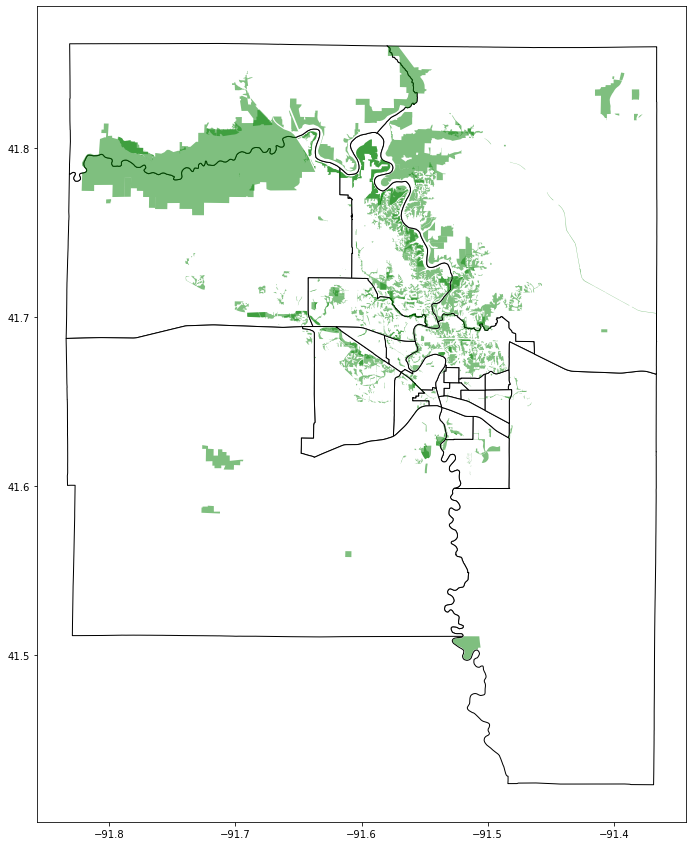

In [284]:
#plot again the greenspace polygons with the polygons for the census data

#base of the plot = the census tract shapefile
base = census.plot(color='white', edgecolor='black', figsize=(15,15))
#greenspace polygons in slightly opaque green
gdf.plot(ax=base, color="green", markersize=5, alpha=.5)


In [285]:
from pyproj import CRS

# change geodataframes to crs 26998 to calculate correct area (still sort of off...)
larger_poly = census.to_crs(CRS.from_epsg(26998))
smaller_poly = gdf.to_crs(CRS.from_epsg(26998))

# create empty lists to store results
intersection_areas = []
larger_poly_names = []
smaller_poly_names = []
total_intersection_area = 0.0

# iterate over each row in the larger polygon dataframe
for idx_l, row_l in larger_poly.iterrows():
    larger_poly_name = row_l['TRACTCE']
    larger_poly_geom = row_l['geometry']
    
    # iterate over each row in the smaller polygon dataframe
    for idx_s, row_s in smaller_poly.iterrows():
        smaller_poly_name = row_s['name']
        smaller_poly_geom = row_s['geometry']
        
        # calculate the intersection between the two polygons
        intersection_poly = gpd.overlay(gpd.GeoDataFrame(geometry=[larger_poly_geom]), gpd.GeoDataFrame(geometry=[smaller_poly_geom]), how='intersection')
        if len(intersection_poly) > 0:
            intersection_area = intersection_poly.geometry.area[0] / 1e6 # convert to km^2
            total_intersection_area += intersection_area
        else:
            intersection_area = 0.0
       
    # append results to lists
        intersection_areas.append(intersection_area)
        larger_poly_names.append(larger_poly_name)
        smaller_poly_names.append(smaller_poly_name)

# create a new dataframe with the results
result_df = gpd.GeoDataFrame({'larger_poly_name': larger_poly_names, 'smaller_poly_name': smaller_poly_names, 
                              'intersection_area': intersection_areas})
result_df

larger_poly_name               smaller_poly_name  intersection_area
0               001801  Ryerson's Woods State Preserve                0.0
1               001801       Frytown Conservation Area                0.0
2               001801                             NaN                0.0
3               001801                             NaN                0.0
4               001801                             NaN                0.0
...                ...                             ...                ...
31939           001400                             NaN                0.0
31940           001400                             NaN                0.0
31941           001400                             NaN                0.0
31942           001400                             NaN                0.0
31943           001400                             NaN                0.0

[31944 rows x 3 columns]

In [286]:
#sum all areas by each larger polygon (the census tracts)
result_df = result_df.groupby(by=result_df['larger_poly_name']).sum()[['intersection_area']].reset_index()
result_df

larger_poly_name  intersection_area
0            000100           6.179200
1            000200           0.253484
2            000301           4.098470
3            000302           0.071547
4            000400           4.345286
5            000500           0.342985
6            000600           0.090594
7            001100           0.000000
8            001200           0.038796
9            001300           0.009563
10           001400           0.109784
11           001500           0.020725
12           001600           0.005025
13           001700           0.011491
14           001801           0.939804
15           001802           0.297881
16           002100           0.019173
17           002300           0.226952
18           010100          30.648565
19           010200          34.176931
20           010301          40.622895
21           010302          20.370125
22           010400           4.023017
23           010500           1.826317

In [287]:
# merge the intersection areas with the larger polygon GeoDataFrame
merged_df = larger_poly.merge(result_df, left_on='TRACTCE', right_on='larger_poly_name')

merged_df

STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0       19      103  001801  19103001801   18.01   Census Tract 18.01  G5020   
1       19      103  010301  19103010301  103.01  Census Tract 103.01  G5020   
2       19      103  010302  19103010302  103.02  Census Tract 103.02  G5020   
3       19      103  001802  19103001802   18.02   Census Tract 18.02  G5020   
4       19      103  000200  19103000200       2       Census Tract 2  G5020   
5       19      103  000301  19103000301    3.01    Census Tract 3.01  G5020   
6       19      103  001600  19103001600      16      Census Tract 16  G5020   
7       19      103  001300  19103001300      13      Census Tract 13  G5020   
8       19      103  001500  19103001500      15      Census Tract 15  G5020   
9       19      103  001700  19103001700      17      Census Tract 17  G5020   
10      19      103  002100  19103002100      21      Census Tract 21  G5020   
11      19      103  002300  19103002300      23      Census Tract 23  G5020   
12      19      103  000600  19103000600       6       Census Tract 6  G5020   
13      19      103  000500  19103000500       5       Census Tract 5  G5020   
14      19      103  001100  19103001100      11      Census Tract 11  G5020   
15      19      103  001200  19103001200      12      Census Tract 12  G5020   
16      19      103  000100  19103000100       1       Census Tract 1  G5020   
17      19      103  010500  19103010500     105     Census Tract 105  G5020   
18      19      103  000400  19103000400       4       Census Tract 4  G5020   
19      19      103  010400  19103010400     104     Census Tract 104  G5020   
20      19      103  000302  19103000302    3.02    Census Tract 3.02  G5020   
21      19      103  010100  19103010100     101     Census Tract 101  G5020   
22      19      103  010200  19103010200     102     Census Tract 102  G5020   
23      19      103  001400  19103001400      14      Census Tract 14  G5020   

   FUNCSTAT      ALAND    AWATER     INTPTLAT      INTPTLON  area      area1  \
0         S   13934664    593000  +41.6175794  -091.5012925     0   14527661   
1         S  197309634   1967183  +41.7380390  -091.7216768     0  199276816   
2         S   40226649   4782790  +41.7438502  -091.5807048     0   45009443   
3         S    3294885    124425  +41.6366549  -091.5242066     0    3419307   
4         S    3173368     95385  +41.6784456  -091.5705349     0    3268754   
5         S   19799792    112799  +41.7008388  -091.6009113     0   19912592   
6         S    1070193         0  +41.6566484  -091.5259596     0    1070195   
7         S    1839703         0  +41.6621556  -091.4923332     0    1839706   
8         S    1476994         0  +41.6523399  -091.5102310     0    1476995   
9         S    3944928     24865  +41.6425449  -091.5094982     0    3969792   
10        S     830974    102373  +41.6613117  -091.5361396     0     933352   
11        S    3425128    211620  +41.6658768  -091.5469903     0    3636749   
12        S    1207298     49909  +41.6513187  -091.5442580     0    1257206   
13        S    5009489         0  +41.6498904  -091.5650786     0    5009490   
14        S     942778         0  +41.6655698  -091.5284791     0     942774   
15        S    1224066         0  +41.6608064  -091.5108113     0    1224065   
16        S   19555609    473970  +41.6833985  -091.5144542     0   20029579   
17        S  314428241   1849882  +41.5436255  -091.4350440     0  316278146   
18        S   37180226         0  +41.6546880  -091.6099300     0   37180227   
19        S  444457781   1629061  +41.5936075  -091.6822704     0  446086848   
20        S    3337753         0  +41.6862146  -091.5946836     0    3337759   
21        S  310306242  10090900  +41.7766742  -091.4669488     0  320397152   
22        S  156756841   3978508  +41.8178996  -091.7075010     0  160735360   
23        S    2906778         0  +41.6488961  -091.4913927     0    2906776   

 

In [288]:
merged_df = merged_df.to_crs(epsg=26998)


#find total area of census tract polygons to normalize the variable
#create new variable name
merged_df['total_area'] = 0

#loop through each row in merged_df to calculate area 
for index, row in merged_df.iterrows():
    poly_area = row['geometry'].area / 10**6 
    merged_df.at[index, 'total_area'] = poly_area 

merged_df

STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0       19      103  001801  19103001801   18.01   Census Tract 18.01  G5020   
1       19      103  010301  19103010301  103.01  Census Tract 103.01  G5020   
2       19      103  010302  19103010302  103.02  Census Tract 103.02  G5020   
3       19      103  001802  19103001802   18.02   Census Tract 18.02  G5020   
4       19      103  000200  19103000200       2       Census Tract 2  G5020   
5       19      103  000301  19103000301    3.01    Census Tract 3.01  G5020   
6       19      103  001600  19103001600      16      Census Tract 16  G5020   
7       19      103  001300  19103001300      13      Census Tract 13  G5020   
8       19      103  001500  19103001500      15      Census Tract 15  G5020   
9       19      103  001700  19103001700      17      Census Tract 17  G5020   
10      19      103  002100  19103002100      21      Census Tract 21  G5020   
11      19      103  002300  19103002300      23      Census Tract 23  G5020   
12      19      103  000600  19103000600       6       Census Tract 6  G5020   
13      19      103  000500  19103000500       5       Census Tract 5  G5020   
14      19      103  001100  19103001100      11      Census Tract 11  G5020   
15      19      103  001200  19103001200      12      Census Tract 12  G5020   
16      19      103  000100  19103000100       1       Census Tract 1  G5020   
17      19      103  010500  19103010500     105     Census Tract 105  G5020   
18      19      103  000400  19103000400       4       Census Tract 4  G5020   
19      19      103  010400  19103010400     104     Census Tract 104  G5020   
20      19      103  000302  19103000302    3.02    Census Tract 3.02  G5020   
21      19      103  010100  19103010100     101     Census Tract 101  G5020   
22      19      103  010200  19103010200     102     Census Tract 102  G5020   
23      19      103  001400  19103001400      14      Census Tract 14  G5020   

   FUNCSTAT      ALAND    AWATER     INTPTLAT      INTPTLON  area      area1  \
0         S   13934664    593000  +41.6175794  -091.5012925     0   14527661   
1         S  197309634   1967183  +41.7380390  -091.7216768     0  199276816   
2         S   40226649   4782790  +41.7438502  -091.5807048     0   45009443   
3         S    3294885    124425  +41.6366549  -091.5242066     0    3419307   
4         S    3173368     95385  +41.6784456  -091.5705349     0    3268754   
5         S   19799792    112799  +41.7008388  -091.6009113     0   19912592   
6         S    1070193         0  +41.6566484  -091.5259596     0    1070195   
7         S    1839703         0  +41.6621556  -091.4923332     0    1839706   
8         S    1476994         0  +41.6523399  -091.5102310     0    1476995   
9         S    3944928     24865  +41.6425449  -091.5094982     0    3969792   
10        S     830974    102373  +41.6613117  -091.5361396     0     933352   
11        S    3425128    211620  +41.6658768  -091.5469903     0    3636749   
12        S    1207298     49909  +41.6513187  -091.5442580     0    1257206   
13        S    5009489         0  +41.6498904  -091.5650786     0    5009490   
14        S     942778         0  +41.6655698  -091.5284791     0     942774   
15        S    1224066         0  +41.6608064  -091.5108113     0    1224065   
16        S   19555609    473970  +41.6833985  -091.5144542     0   20029579   
17        S  314428241   1849882  +41.5436255  -091.4350440     0  316278146   
18        S   37180226         0  +41.6546880  -091.6099300     0   37180227   
19        S  444457781   1629061  +41.5936075  -091.6822704     0  446086848   
20        S    3337753         0  +41.6862146  -091.5946836     0    3337759   
21        S  310306242  10090900  +41.7766742  -091.4669488     0  320397152   
22        S  156756841   3978508  +41.8178996  -091.7075010     0  160735360   
23        S    2906778         0  +41.6488961  -091.4913927     0    2906776   

 

In [289]:
#create a normalized variable for amount of greenspace area by total area

merged_df['normalized_greenspace'] = ((merged_df['intersection_area'] / merged_df['total_area'])*100).apply(lambda x:round(x,2))
merged_df


STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0       19      103  001801  19103001801   18.01   Census Tract 18.01  G5020   
1       19      103  010301  19103010301  103.01  Census Tract 103.01  G5020   
2       19      103  010302  19103010302  103.02  Census Tract 103.02  G5020   
3       19      103  001802  19103001802   18.02   Census Tract 18.02  G5020   
4       19      103  000200  19103000200       2       Census Tract 2  G5020   
5       19      103  000301  19103000301    3.01    Census Tract 3.01  G5020   
6       19      103  001600  19103001600      16      Census Tract 16  G5020   
7       19      103  001300  19103001300      13      Census Tract 13  G5020   
8       19      103  001500  19103001500      15      Census Tract 15  G5020   
9       19      103  001700  19103001700      17      Census Tract 17  G5020   
10      19      103  002100  19103002100      21      Census Tract 21  G5020   
11      19      103  002300  19103002300      23      Census Tract 23  G5020   
12      19      103  000600  19103000600       6       Census Tract 6  G5020   
13      19      103  000500  19103000500       5       Census Tract 5  G5020   
14      19      103  001100  19103001100      11      Census Tract 11  G5020   
15      19      103  001200  19103001200      12      Census Tract 12  G5020   
16      19      103  000100  19103000100       1       Census Tract 1  G5020   
17      19      103  010500  19103010500     105     Census Tract 105  G5020   
18      19      103  000400  19103000400       4       Census Tract 4  G5020   
19      19      103  010400  19103010400     104     Census Tract 104  G5020   
20      19      103  000302  19103000302    3.02    Census Tract 3.02  G5020   
21      19      103  010100  19103010100     101     Census Tract 101  G5020   
22      19      103  010200  19103010200     102     Census Tract 102  G5020   
23      19      103  001400  19103001400      14      Census Tract 14  G5020   

   FUNCSTAT      ALAND    AWATER  ...      INTPTLON area      area1  hgh  \
0         S   13934664    593000  ...  -091.5012925    0   14527661    0   
1         S  197309634   1967183  ...  -091.7216768    0  199276816    0   
2         S   40226649   4782790  ...  -091.5807048    0   45009443    0   
3         S    3294885    124425  ...  -091.5242066    0    3419307    0   
4         S    3173368     95385  ...  -091.5705349    0    3268754    0   
5         S   19799792    112799  ...  -091.6009113    0   19912592    0   
6         S    1070193         0  ...  -091.5259596    0    1070195    0   
7         S    1839703         0  ...  -091.4923332    0    1839706    0   
8         S    1476994         0  ...  -091.5102310    0    1476995    0   
9         S    3944928     24865  ...  -091.5094982    0    3969792    0   
10        S     830974    102373  ...  -091.5361396    0     933352    0   
11        S    3425128    211620  ...  -091.5469903    0    3636749    0   
12        S    1207298     49909  ...  -091.5442580    0    1257206    0   
13        S    5009489         0  ...  -091.5650786    0    5009490    0   
14        S     942778         0  ...  -091.5284791    0     942774    0   
15        S    1224066         0  ...  -091.5108113    0    1224065    0   
16        S   19555609    473970  ...  -091.5144542    0   20029579    0   
17        S  314428241   1849882  ...  -091.4350440    0  316278146    0   
18        S   37180226         0  ...  -091.6099300    0   37180227    0   
19        S  444457781   1629061  ...  -091.6822704    0  446086848    0   
20        S    3337753         0  ...  -091.5946836    0    3337759    0   
21        S  310306242  10090900  ...  -091.4669488    0  320397152    0   
22        S  156756841   3978508  ...  -091.7075010    0  160735360    0   
23        S    2906778         0  ...  -091.4913927    0    2906776    0   

                                             geometry pointcount  \
0   POLYGON ((1096868.109 610051.

In [290]:
#problem with the projection....................... not switching back
merged_df.crs = {'init': 'epsg:4326'}

merged_df

C:\Users\tfilip\Anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0       19      103  001801  19103001801   18.01   Census Tract 18.01  G5020   
1       19      103  010301  19103010301  103.01  Census Tract 103.01  G5020   
2       19      103  010302  19103010302  103.02  Census Tract 103.02  G5020   
3       19      103  001802  19103001802   18.02   Census Tract 18.02  G5020   
4       19      103  000200  19103000200       2       Census Tract 2  G5020   
5       19      103  000301  19103000301    3.01    Census Tract 3.01  G5020   
6       19      103  001600  19103001600      16      Census Tract 16  G5020   
7       19      103  001300  19103001300      13      Census Tract 13  G5020   
8       19      103  001500  19103001500      15      Census Tract 15  G5020   
9       19      103  001700  19103001700      17      Census Tract 17  G5020   
10      19      103  002100  19103002100      21      Census Tract 21  G5020   
11      19      103  002300  19103002300      23      Census Tract 23  G5020   
12      19      103  000600  19103000600       6       Census Tract 6  G5020   
13      19      103  000500  19103000500       5       Census Tract 5  G5020   
14      19      103  001100  19103001100      11      Census Tract 11  G5020   
15      19      103  001200  19103001200      12      Census Tract 12  G5020   
16      19      103  000100  19103000100       1       Census Tract 1  G5020   
17      19      103  010500  19103010500     105     Census Tract 105  G5020   
18      19      103  000400  19103000400       4       Census Tract 4  G5020   
19      19      103  010400  19103010400     104     Census Tract 104  G5020   
20      19      103  000302  19103000302    3.02    Census Tract 3.02  G5020   
21      19      103  010100  19103010100     101     Census Tract 101  G5020   
22      19      103  010200  19103010200     102     Census Tract 102  G5020   
23      19      103  001400  19103001400      14      Census Tract 14  G5020   

   FUNCSTAT      ALAND    AWATER  ...      INTPTLON area      area1  hgh  \
0         S   13934664    593000  ...  -091.5012925    0   14527661    0   
1         S  197309634   1967183  ...  -091.7216768    0  199276816    0   
2         S   40226649   4782790  ...  -091.5807048    0   45009443    0   
3         S    3294885    124425  ...  -091.5242066    0    3419307    0   
4         S    3173368     95385  ...  -091.5705349    0    3268754    0   
5         S   19799792    112799  ...  -091.6009113    0   19912592    0   
6         S    1070193         0  ...  -091.5259596    0    1070195    0   
7         S    1839703         0  ...  -091.4923332    0    1839706    0   
8         S    1476994         0  ...  -091.5102310    0    1476995    0   
9         S    3944928     24865  ...  -091.5094982    0    3969792    0   
10        S     830974    102373  ...  -091.5361396    0     933352    0   
11        S    3425128    211620  ...  -091.5469903    0    3636749    0   
12        S    1207298     49909  ...  -091.5442580    0    1257206    0   
13        S    5009489         0  ...  -091.5650786    0    5009490    0   
14        S     942778         0  ...  -091.5284791    0     942774    0   
15        S    1224066         0  ...  -091.5108113    0    1224065    0   
16        S   19555609    473970  ...  -091.5144542    0   20029579    0   
17        S  314428241   1849882  ...  -091.4350440    0  316278146    0   
18        S   37180226         0  ...  -091.6099300    0   37180227    0   
19        S  444457781   1629061  ...  -091.6822704    0  446086848    0   
20        S    3337753         0  ...  -091.5946836    0    3337759    0   
21        S  310306242  10090900  ...  -091.4669488    0  320397152    0   
22        S  156756841   3978508  ...  -091.7075010    0  160735360    0   
23        S    2906778         0  ...  -091.4913927    0    2906776    0   

                                             geometry pointcount  \
0   POLYGON ((1096868.10868 61005

In [291]:
#project back to epsg: 4326 then create choropleth of the normalized variable
merged_df.to_crs(epsg=4326)

#create a folium choropleth using the number of points (greenspace centroids) in each census tract 
choromap2 = folium.Map(location=[41.6611, -91.5302], zoom_start=10)

#create the choropleth
folium.Choropleth(geo_data=merged_df.to_json(),
                  name='choropleth',
                  data=merged_df,
                  columns=["GEOID", "normalized_greenspace"],
                  fill_color='YlGn',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                 # nan_fill_color='grey', #color if NaN data
                  key_on='feature.properties.GEOID', #taken from the json file
                  legend_name='% Area of Greenspace',
                  vmin=0.1,
                  vmax=45).add_to(choromap2)

#style function for the popups
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', #outline of polygon color (black)
                            'fillOpacity': 0.5, 
                            'weight': 0.1}

#style function for when highlight over 
highlight_function = lambda x: {'fillColor': '#000000', #when hover over, fill color (black)
                                'color':'#000000', 
                                'fillOpacity': 0.5, 
                                'weight': 0.1}
#create the popup object
popup = folium.features.GeoJson(
    merged_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['TRACTCE','pointcount'],  # use fields from the json file
        aliases=['Census Tract Number: ','% Area that is Greenspace: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
choromap2.add_child(popup)
choromap2.keep_in_front(popup)
folium.LayerControl().add_to(choromap2)

choromap2

# Make a meshgrid for KDE plot

In [ ]:
#just get polygons to see if it works then
polyOnly = gdf[gdf.geom_type == 'Polygon']

polyOnly

In [ ]:
#run kde on just the centroids 
import geoplot
import geoplot.crs as gcrs

In [ ]:
from itertools import product
from shapely.geometry import Point
import shapely.vectorized

# define grid spec from min to max value with spacing of grid_res=10
grid_res = 10

# # this isn't necessary in your case, but if your polygon had
# # boundaries not falling on grid edges, you might want to ensure
# # the grid started on specific cell boundaries or midpoints
# minx = np.floor(gdf.geometry.bounds[0] / grid_res) * grid_res
# maxx = np.ceil(gdf.geometry.bounds[2] / grid_res) * grid_res
# miny = np.floor(gdf.geometry.bounds[1] / grid_res) * grid_res
# maxy = np.ceil(gdf.geometry.bounds[3] / grid_res) * grid_res


# you can form the grid by setting up the coordinates and then filling
# the grid with numpy.meshgrid
x = np.arange(minx, maxx + grid_res / 2, grid_res)
y = np.arange(miny, maxy + grid_res / 2, grid_res)
XX, YY = np.meshgrid(x, y)

# use shapely.vectorized to find all points within the polygon
in_polygon = shapely.vectorized.contains(gdf.geometry, XX, YY)

# filter the points and flatten them to 1D vectors
x_in_polygon = XX[in_polygon].ravel()
y_in_polygon = YY[in_polygon].ravel()

In [ ]:
from itertools import product
from shapely.geometry import Point
import shapely.vectorized

xmin, ymin, xmax, ymax = gdf.bounds
# spacing = 10
# xcoords = [i for i in np.arange(xmin, xmax, spacing)]
# ycoords = [i for i in np.arange(ymin, ymax, spacing)]

gdf.bounds

In [ ]:
geom_pts = gen_n_point_in_polygon(200, gdf2)